# Exp3 with an adversary

In this notebook we will visualize the performance of the Exp3 algorithm on stochastic arms and compare that to an adversarial scenario.

We will use the same reward probabilities as for Thompson sampling. That is:

`[0.3, 0.5, 0.4, 0.45, 0.3, 0.35]`

For the implementation that follows, the **adversary** behaves following these "fair game" rules:
- at each time step, the adversay gets **all the information** of which arm was chosen and which reward was recevied.
- the adversary can **not influence the current step**, only the future ones.
- the adversary can **only "rearrenge" the arms**, that is, reorded the probabilities of a reward being given, but it can not change the value of this probabilities.

The code implementation is within [this repository](https://github.com/maxserra/mab), in the respectively imported files.

In [20]:
import numpy as np
import matplotlib.pyplot as plt

import main as main

In [13]:
ARM_PROBS=[0.3, 0.5, 0.4, 0.45, 0.3, 0.35]
N_GAMES=30
N_ROUNDS=10000

## Stochastic arms

Let's first see how does Exp3 behave whithout an adversary.

In [24]:
stoch_rewards, stoch_weights = main.exp3_stochastic_arms(arm_probs=ARM_PROBS, gamma=0.07, 
                                                         n_games=N_GAMES, n_rounds=N_ROUNDS)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:09<00:00,  3.28it/s]


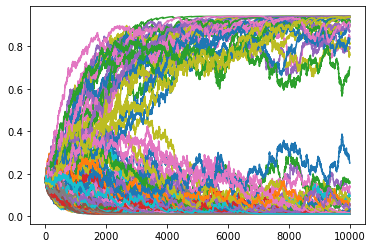

In [25]:
for i in range(N_GAMES):
    plt.plot(weights[i])

plt.show()

The result above shows the weights that the Exp3 agent is giving to different arms. In each game, the arm with highest rewards is favoured and the agent increases its weight.

## Adversarial arms

Now let's see how Exp3 performs with the adversary described above.

In [26]:
adver_rewards, adver_weights = main.exp3_adversarial_env(arm_probs=ARM_PROBS, gamma=0.07, 
                                                         n_games=N_GAMES, n_rounds=N_ROUNDS)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:13<00:00,  2.21it/s]


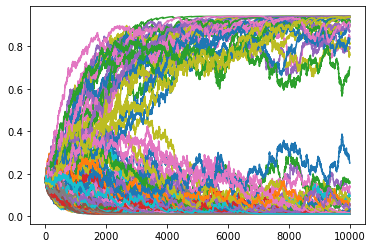

In [27]:
for i in range(N_GAMES):
    plt.plot(weights[i])

plt.show()

In contrast to the previous plot, here we can see that the Exp3 agent is not strongly favouring any arm, because the environment is constantly changing.

## Achieved regret

We can now check what is the regret that Exp3 achieves under both scenarios.

Given the code implementation (dynamic drawing of samples) we will take the maximum rewards possible to be the **expected** reward of choosing the best arm. That is $0.5*{N\_ROUNDS} = 5000$. 

Note that I am using $N\_ROUNDS = 10000$

### Stochastic regret

In [31]:
5000 - np.mean(np.array(stoch_rewards)[:,-1])

234.10000000000036

### Adversarial regret

In [32]:
5000 - np.mean(np.array(adver_rewards)[:,-1])

1262.0666666666666

### Random agent regret

For the sake of comparison, what is the expected regret of a random agent?

In [34]:
5000 - np.mean(ARM_PROBS) * 10000

1166.6666666666665

Surprisingly the **realization** of the regret for the adversarial agent is larger than that of the **expected** regret of a random agent. This gives me confidence that the adversarial envrionment I have used is actually a decent one, since it succesfully messes up with the Exp3 algorithm :)